<a href="https://colab.research.google.com/github/vivianesilviana/vivianesilviana/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree dengan Python
Python adalah bahasa pemrograman serba guna dan menawarkan paket dan alat pembelajaran mesin yang canggih kepada para ilmuwan data. Kami akan membuat model pohon Keputusan menggunakan paket pembelajaran mesin paling terkenal dari python, 'scikit-learn'. Kami akan membuat model menggunakan algoritme 'DecisionTreeClassifier' yang disediakan oleh scikit-learn, lalu visualisasikan model menggunakan fungsi 'plot_tree'.

##Langkah-1: Mengimpor paket packages
Packges yang terlibat dalam membangun model kami adalah panda, scikit-learn, dan NumPy. Ikuti kode untuk mengimpor paket yang diperlukan dengan python.

In [ ]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

rcParams['figure.figsize'] = (25, 20)

Setelah mengimpor semua packages yang diperlukan untuk membuat model kita, sekarang saatnya mengimpor data dan melakukan beberapa EDA padanya.

##Langkah-2: Mengimport data dan EDA
Pada langkah ini, kita akan menggunakan packages 'Pandas' yang tersedia dalam python untuk diimpor dan melakukan beberapa EDA padanya. Kumpulan data yang akan kami gunakan untuk membangun model pohon keputusan kami adalah kumpulan data obat yang diresepkan untuk pasien berdasarkan kriteria tertentu. 


In [ ]:
#df = pd.read_csv('drug.csv')
#df.drop('Unnamed: 0', axis = 1, inplace = True)
#print(cl(df.head(), attrs = ['bold']))

df=pd.read_csv("https://raw.githubusercontent.com/millaoktavia/millaoktavia/main/drug.csv")
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Setelah mengimpor data, mari kita dapatkan beberapa informasi dasar tentang data menggunakan fungsi 'info'. Informasi yang diberikan oleh fungsi ini mencakup jumlah entri, nomor indeks, nama kolom, jumlah nilai bukan nol, jenis atribut, dll.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


##Langkah-3: Pemrosesan Data
Kita dapat melihat bahwa atribut seperti Sex, BP, dan Kolesterol bersifat kategoris dan tipe objek di alam. Masalahnya, algoritma pohon keputusan dalam scikit-learn tidak mendukung variabel X menjadi tipe 'objek'. Jadi, perlu untuk mengubah nilai 'objek' ini menjadi nilai 'biner'. 

In [ ]:
for i in df.Sex.values:
    if i  == 'M':
        df.Sex.replace(i, 0, inplace = True)
    else:
        df.Sex.replace(i, 1, inplace = True)

for i in df.BP.values:
    if i == 'LOW':
        df.BP.replace(i, 0, inplace = True)
    elif i == 'NORMAL':
        df.BP.replace(i, 1, inplace = True)
    elif i == 'HIGH':
        df.BP.replace(i, 2, inplace = True)

for i in df.Cholesterol.values:
    if i == 'LOW':
        df.Cholesterol.replace(i, 0, inplace = True)
    else:
        df.Cholesterol.replace(i, 1, inplace = True)

print(cl(df, attrs = ['bold']))

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    1   2            1   25.355  DrugY
1     47    1   0            1   13.093  drugC
2     47    1   0            1   10.114  drugC
3     28    1   1            1    7.798  drugX
4     61    1   0            1   18.043  DrugY
..   ...  ...  ..          ...      ...    ...
195   56    1   0            1   11.567  drugC
196   16    1   0            1   12.006  drugC
197   52    1   1            1    9.894  drugX
198   23    1   1            1   14.020  drugX
199   40    1   0            1   11.349  drugX

[200 rows x 6 columns]


Kita dapat mengamati bahwa semua nilai 'objek' diproses menjadi nilai 'biner' untuk merepresentasikan data kategorikal. Misalnya, di atribut Cholesterol, nilai yang menunjukkan 'LOW' diproses menjadi 0 dan 'HIGH' menjadi 1. Sekarang kita siap membuat variabel dependen dan variabel independen dari data kita.

##Langkah-4: Memisahkan data
Setelah memproses data kita menjadi struktur yang tepat, kita sekarang siap untuk menentukan variabel 'X' atau variabel independen dan variabel 'Y' atau variabel dependen.

In [ ]:
X_var = df[['Sex', 'BP', 'Age', 'Cholesterol', 'Na_to_K']].values # independent variable
y_var = df['Drug'].values # dependent variable

print(cl('X variable samples : {}'.format(X_var[:5]), attrs = ['bold']))
print(cl('Y variable samples : {}'.format(y_var[:5]), attrs = ['bold']))

X variable samples : [[ 1.     2.    23.     1.    25.355]
 [ 1.     0.    47.     1.    13.093]
 [ 1.     0.    47.     1.    10.114]
 [ 1.     1.    28.     1.     7.798]
 [ 1.     0.    61.     1.    18.043]]
Y variable samples : ['DrugY' 'drugC' 'drugC' 'drugX' 'DrugY']


Sekarang kita dapat membagi data menjadi satu set pelatihan dan set pengujian dengan variabel X dan Y yang telah ditentukan dengan menggunakan algoritme 'train_test_split' di scikit-learn. Ikuti kode untuk membagi data dengan python.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train shape : {}'.format(X_train.shape), attrs = ['bold'], color = 'yellow'))
print(cl('X_test shape : {}'.format(X_test.shape), attrs = ['bold'], color = 'yellow'))
print(cl('y_train shape : {}'.format(y_train.shape), attrs = ['bold'], color = 'yellow'))
print(cl('y_test shape : {}'.format(y_test.shape), attrs = ['bold'], color = 'yellow'))


X_train shape : (160, 5)
X_test shape : (40, 5)
y_train shape : (160,)
y_test shape : (40,)


Sekarang kita memiliki semua komponen untuk membangun model pohon keputusan kita.

##Langkah-5: Membangun model & Prediksi
Membangun pohon keputusan dapat dilakukan dengan bantuan algoritme 'DecisionTreeClassifier' yang disediakan oleh paket scikit-learn. Setelah itu, kita bisa membuat prediksi data kita menggunakan model. Terakhir, ketepatan hasil prediksi kami dapat dihitung menggunakan metrik evaluasi 'akurasi_skor'.

In [ ]:
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))

Accuracy of the model is 95%


Pada langkah pertama kode kami, kami mendefinisikan variabel yang disebut variabel 'model' di mana kami menyimpan model DecisionTreeClassifier. Selanjutnya, kami menyesuaikan dan melatih model menggunakan set pelatihan kami. Setelah itu, mendefinisikan variabel yang disebut variabel 'pred_model' di mana kami menyimpan semua nilai yang diprediksi oleh model kami pada data. Terakhir, kami menghitung ketepatan nilai prediksi kami ke nilai aktual yang menghasilkan akurasi 95%.

##Langkah-6: Memvisualisasikan model
Sekarang diperoleh model pohon keputusan dan memvisualisasikannya dengan memanfaatkan fungsi 'plot_tree' yang disediakan oleh paket scikit-learn di python. Ikuti kode untuk menghasilkan diagram pohon yang indah dari model pohon keputusan dengan python.

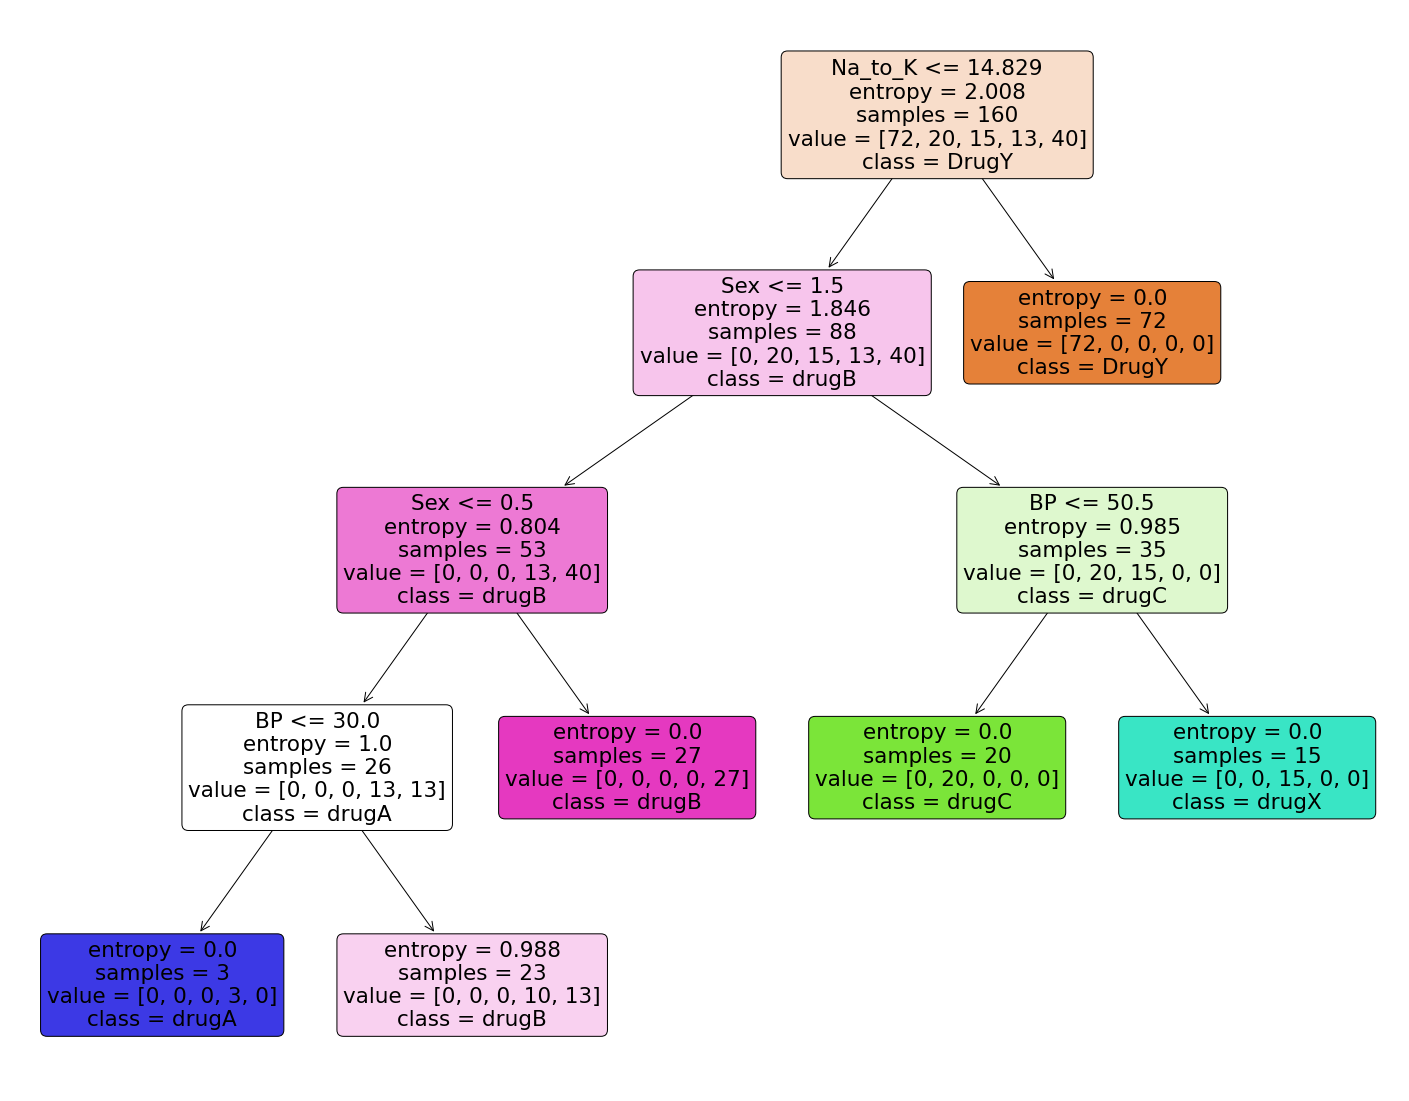

In [ ]:
feature_names = df.columns[:5]
target_names = df['Drug'].unique().tolist()

plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 

#Kesimpulan!
Ada banyak teknik dan algoritme lain yang digunakan untuk menyesuaikan pohon keputusan dan untuk menghindari overfitting, seperti pemangkasan. Meskipun, pohon keputusan biasanya tidak stabil yang berarti perubahan kecil dalam data dapat menyebabkan perubahan besar dalam struktur pohon yang optimal, namun kesederhanaannya menjadikannya kandidat yang kuat untuk berbagai aplikasi. Sebelum jaringan saraf menjadi populer, pohon keputusan adalah algoritme canggih dalam Pembelajaran Mesin. 